In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sqlite3
from scipy.stats import ttest_ind,stats


## Loading the Dataset

In [ ]:
#creatinng database connection
conn = sqlite3.connect('../inventory.db') 

#testing the connection
print(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn))

                  name
0      begin_inventory
1        end_inventory
2            purchases
3      purchase_prices
4                sales
5       vendor_invoice
6  vendor_sale_summary


In [3]:
#fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sale_summary", conn)

In [4]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5.101920e+06,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4.538121e+06,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4.475973e+06,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4.223108e+06,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


## Exploratory Data Analysis

- Previously, we explained the various tables in the database to identify key variables, understand their relationshis, and determine which ones should be included in the final analysis
- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [5]:
#summary statistics
df.describe()

,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,35.643671,847.360550,3140.886831,3.010669e+04,4.223907e+04,18793.783627,3077.482136,1774.226259,61433.763214,1.213238e+04,-inf,1.706793,2.504390
std,18753.519148,12662.187074,109.269375,148.246016,664.309212,11095.086769,1.230678e+05,1.676553e+05,44952.773386,10952.851391,10975.582240,60938.458032,4.622434e+04,NaN,6.020460,8.459067
min,2.000000,58.000000,0.360000,0.490000,50.000000,1.000000,7.100000e-01,0.000000e+00,0.000000,0.000000,0.000000,0.090000,-5.200278e+04,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,36.000000,4.534575e+02,7.292200e+02,289.710000,33.000000,4.800000,14069.870000,5.292000e+01,1.332451e+01,0.807229,1.153729
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,262.000000,3.655465e+03,5.298045e+03,2857.800000,261.000000,46.570000,50293.620000,1.399640e+03,3.040546e+01,0.981529,1.436894
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,1975.750000,2.073824e+04,2.839692e+04,16059.562500,1929.250000,418.650000,79528.990000,8.660200e+03,3.995613e+01,1.039342,1.665449
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,337660.000000,3.811252e+06,5.101920e+06,672819.310000,334939.000000,368242.800000,257032.070000,1.290668e+06,9.971666e+01,274.500000,352.928571


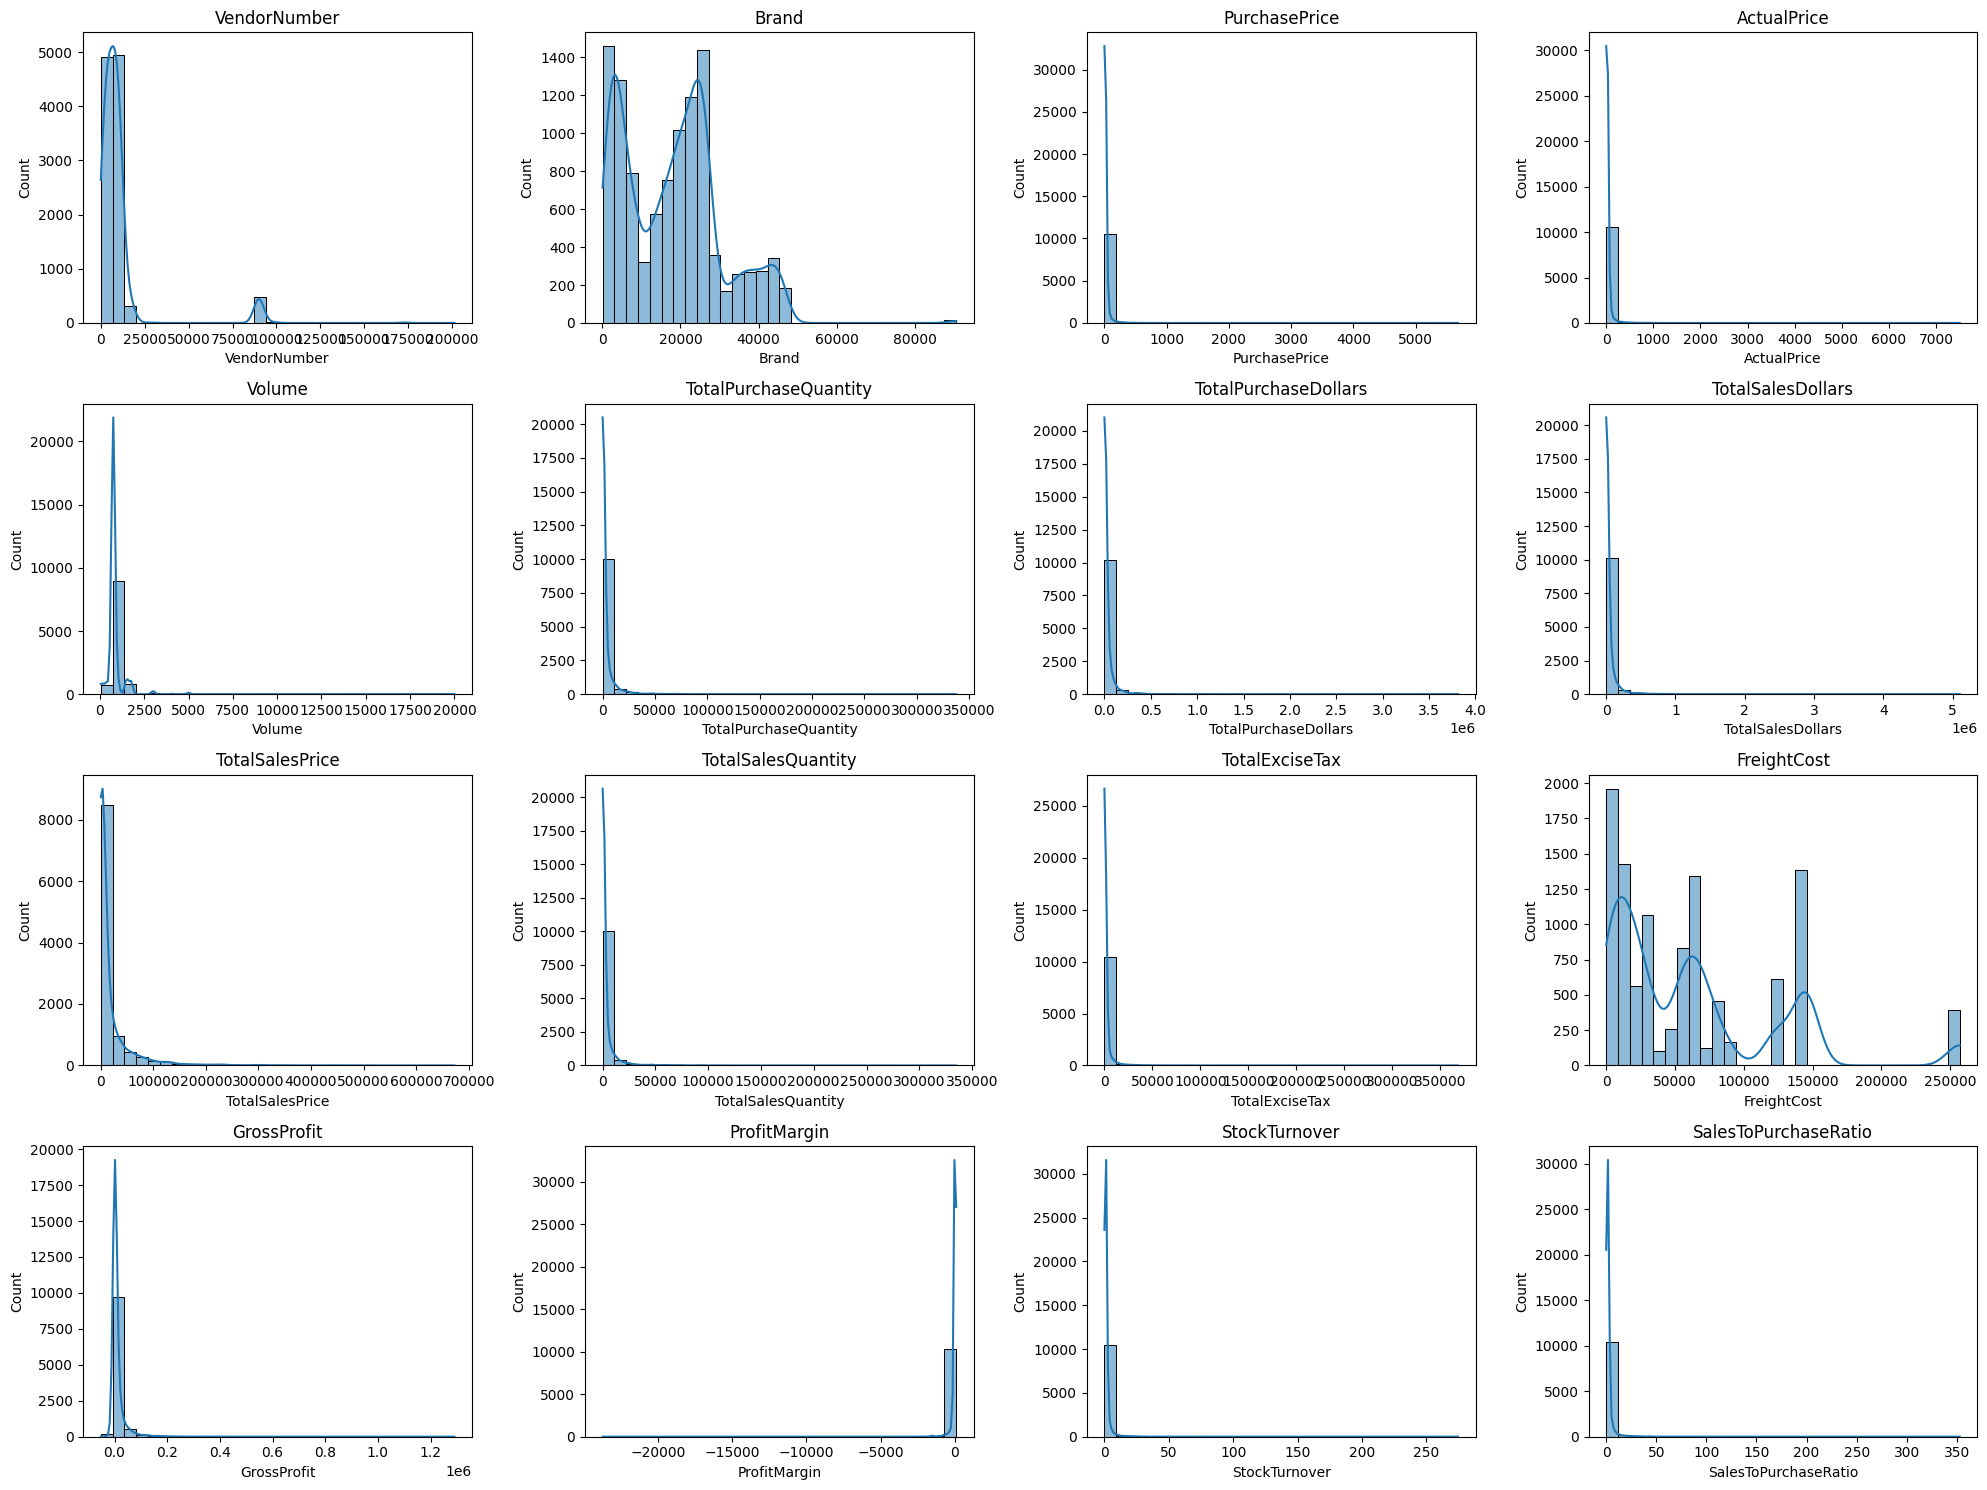

In [18]:
#Distribution plots for Numerical columns 
numerical_cols=df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()